# **ADM - HW2**

*Madina Rakhimbayeva 2189800

## **[RQ1] Before diving deep into the dataset provided, it's crucial to understand its structure and main features.**
### Data scientists usually take the first step of performing an Exploratory Data Analysis (EDA). 
### What can you say about our dataset? Please perform an EDA and summarize the dataset's key characteristics using visualizations and tabular summaries.

* First, I imported these libraries to analyze the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import pickle as pk
import matplotlib.ticker as ticker

* Below we are reading the dataset along with applying the dateparser function to organize data in columns:  
 *timestamp_created, timestamp_updated, author.last_played*

In [ ]:
def parse_datetime(seconds):
    return pd.to_datetime(seconds, unit='s')

data = pd.read_csv('steam_reviews.csv', sep=",", header='infer',
                   index_col=0,
                   parse_dates=["timestamp_created", "timestamp_updated", "author.last_played"],
                   date_parser=parse_datetime)

* The printed the data shape function shows in total of 21,747,371 rows and 22 columns.

In [ ]:
data.shape

(21747371, 22)

* Then I looked into columns and got information of their names and data type

In [ ]:
data.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   review                          object        
 5   timestamp_created               datetime64[ns]
 6   timestamp_updated               datetime64[ns]
 7   recommended                     bool          
 8   votes_helpful                   int64         
 9   votes_funny                     int64         
 10  weighted_vote_score             float64       
 11  comment_count                   int64         
 12  steam_purchase                  bool          
 13  received_for_free               bool          
 14  written_during_early_access     bool          
 15  a

* The following step is to show the **Top 5** records in the dataset:

In [ ]:
data.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:32,2021-01-23 06:00:32,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:22:40
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:49:52,2021-01-23 05:49:52,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:19:28
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:45:36,2021-01-23 05:45:36,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:48
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:48,2021-01-23 05:32:48,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:36:48
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:24:16,2021-01-23 05:24:16,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:24


* Next is to check null values in each column

In [ ]:
data.isnull().sum()

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

The dataset consists of 21,747,371 rows, with 59,436 null values that were removed due to their small proportion, which accounts for only 0.27% of the total.

In [ ]:
data.dropna(inplace=True)

* After deleting the nulls the database consist of 21,687,945 rows. It is clear and redy to use in the analysis.

In [ ]:
data.shape

(21687945, 22)

* After cleanup, the pandas dataframe object that contains the dataset's contents was serialized.

In [ ]:
with open('steam_reviews_Pickle_File.pkl', 'wb') as file:
    pk.dump(data, file)

* De-serializing the pandas dataframe object to load data into variable named dataset

In [ ]:
with open('steam_reviews_Pickle_File.pkl', 'rb') as file:
    data = pk.load(file)

* Then, the statistical summary of dataset was calculated for numerical columns.

In [ ]:
numerical_cols = ['votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
                  'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever',
                  'author.playtime_last_two_weeks', 'author.playtime_at_review']

data[numerical_cols].describe()

,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07,2.168794e+07
mean,4.055771e+05,1.267431e+05,1.655262e-01,1.309590e-01,1.014071e+06,4.055857e+05,1.611046e+04,1.555894e+02,8.809664e+03
std,1.335567e+09,2.333105e+07,2.434493e-01,2.201967e+00,2.111716e+09,1.335567e+09,3.745428e+04,7.301101e+02,2.389216e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01,2.000000e+00,1.253000e+03,0.000000e+00,5.590000e+02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+01,4.000000e+00,4.315000e+03,0.000000e+00,1.881000e+03
75%,1.000000e+00,0.000000e+00,4.829141e-01,0.000000e+00,1.460000e+02,1.000000e+01,1.493800e+04,0.000000e+00,6.825000e+03
max,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06


In [ ]:
#Printing the number of different languages used for game reviews
print(data['language'].nunique())

28

In [ ]:
#Checking language variables, such as names of different languages used in game reviews. 
print(data['language'].unique())

array(['schinese', 'english', 'turkish', 'spanish', 'russian', 'koreana',
       'latam', 'brazilian', 'portuguese', 'vietnamese', 'polish',
       'french', 'german', 'hungarian', 'ukrainian', 'tchinese',
       'bulgarian', 'czech', 'italian', 'thai', 'greek', 'dutch',
       'finnish', 'romanian', 'japanese', 'swedish', 'danish',
       'norwegian'], dtype=object)

* The folowing step is to visualize dataset to know more about it.

*Bar chart and Pi Chart was chosen to show the number of reviews written in each specific language*

<Axes: title={'center': 'Number of reviews per language'}, xlabel='Language of the review', ylabel='Number of reviews'>

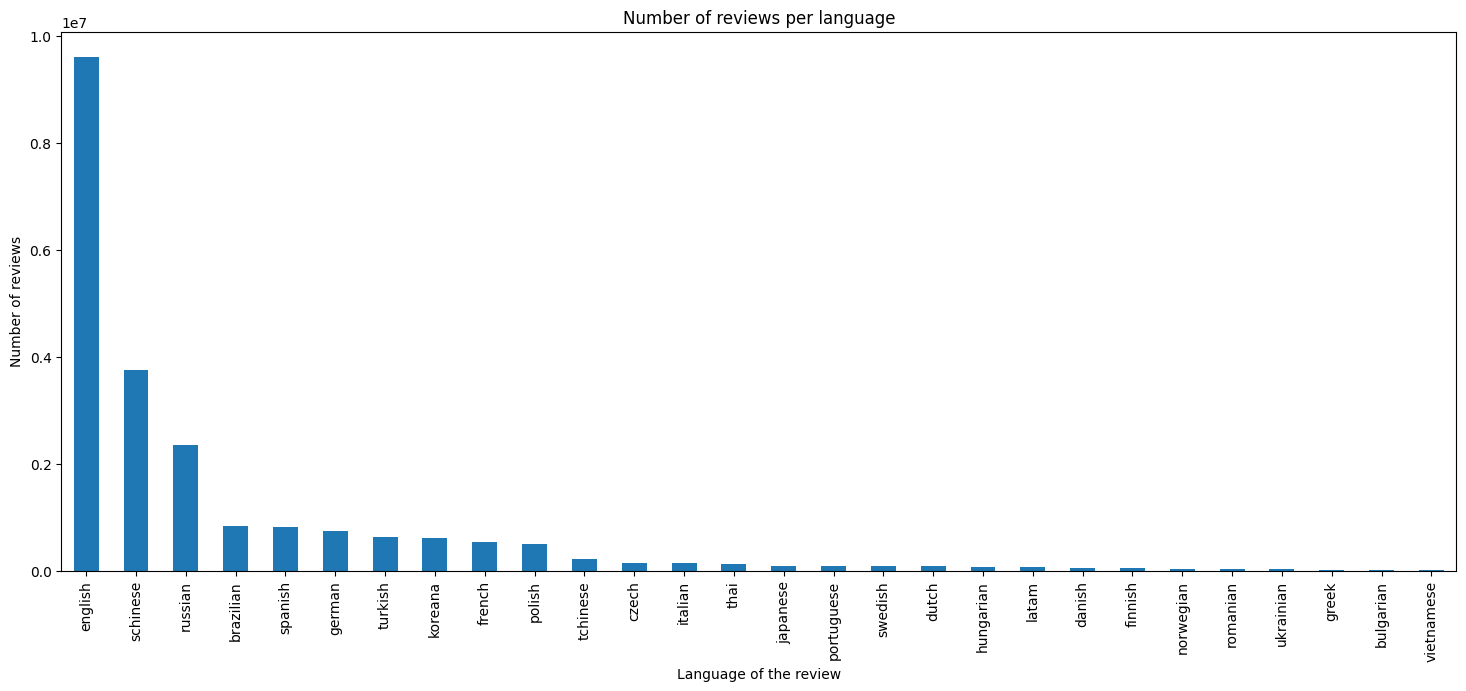

In [ ]:
data['language'].value_counts().plot.bar(xlabel="Language of the review", ylabel="Number of reviews", title="Number of reviews per language", figsize=(17,8))

<Axes: title={'center': 'Number of reviews per language'}, ylabel='count'>

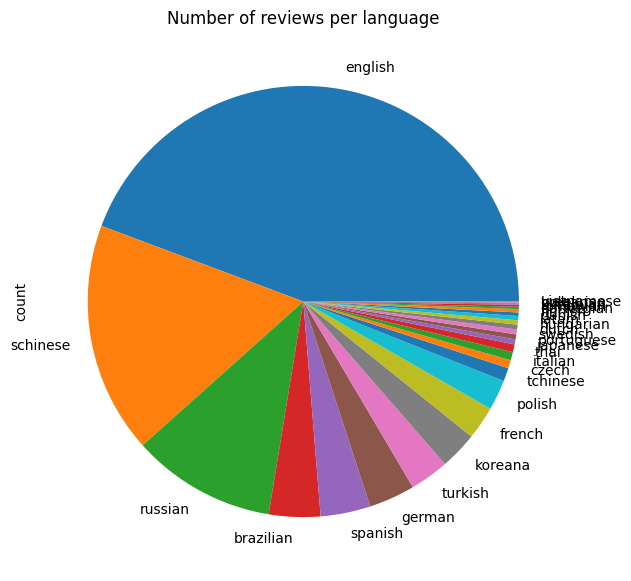

In [ ]:
data['language'].value_counts().plot.pie(title="Number of reviews per language", figsize=(17,8))

In [ ]:
#Showing the number of unique applications reviewed by users
print(data['app_id'].nunique())

315

## **Answer [RQ1]**
### *Conclution:*

After examining the dataset through exploratory data analysis (EDA), several key findings emerged:

- **Application & Language Diversity:** The dataset encompasses feedback from 315 distinct applications, identified by their app_id. Reviews spanned **28** different languages, with **English** being the predominant language. **Chinese** and **Russian** reviews also form a substantial portion, while languages such as **Greek, Ukrainian, and Vietnamese** are represented by considerably fewer entries.


### *Key Insights from Numerical Data:*

- **Votes Helpful**: Most reviews received zero helpful votes. However, a few of them gained an exceptional number of such votes, reaching up to (maxx)   
$$ 4.39 \times 10^{12} $$ 

- **Votes Funny**: Similar to the previous one, while a few ones reached large number of counts $$ 4.29 \times 10^{9} $$
- **Weighted Vote Score**: The **average weighted vote score** is **0.165**, with the majority of reviews having relatively low scores and with maximum score of **0.996**.
- **Playtime Data**:
  - It is discovered that users have enormously huge playtime, with a **median = 4315 hours** (`author.playtime_forever`), and some users having **up to 3.74 million hours** of playtime.
  - **Playtime at review** is also relatively high, with a **median of 1881 hours**.

### *Categorical/Binary Insights:*

- **Review Recommendations**: Recommendation Status: The dataset includes a boolean field (`recommended`), indicating whether or not users recommend the game. The precise distribution of this field isn’t covered in this analysis.
Purchase Method: A critical aspect of the data differentiates between users who purchased the game and those who received it for free. This provides insight into possible biases based on how users obtained the game.
- **Purchase Method:**:  A critical aspect of the data differentiates between users who purchased the game and those who received it for free. This provides insight into possible biases based on how users obtained the game.

# **[RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications.**

* **Identify which applications have the highest and lowest number of reviews.**

**Answer:** The app with the highest number of reviews is PLAYERUNKNOWN'S BATTLEGROUNDS with a total of 1642631 reviews, while Neon Hardcorps having the lowest number of reviews received and only had 197 reviews.

In [ ]:
app_reviews = data.groupby('app_name')['review_id'].count()
max_reviews_app = app_reviews.idxmax()
max_reviews_count = app_reviews.max()
min_reviews_app = app_reviews.idxmin()
min_reviews_count = app_reviews.min()

print(f"App with the highest number of reviews: {max_reviews_app} ({max_reviews_count} reviews)")
print(f"App with the lowest number of reviews: {min_reviews_app} ({min_reviews_count} reviews)")

App with the highest number of reviews: PLAYERUNKNOWN'S BATTLEGROUNDS (1642631 reviews)
App with the lowest number of reviews: Neon Hardcorps (197 reviews)


* **Plot the number of reviews for each application in descending order. What insights can you draw from the plot?**

**Answer - Insights from graph(s)** With 1,642,631 reviews, PLAYERUNKNOWN'S BATTLEGROUNDS is the application with the most reviews, as can be seen from the graph. Compared to the second most reviewed program, which has almost 600,000 fewer reviews, this is far greater. With each succeeding application, the number of reviews steadily declines as we proceed down the list. Interestingly, all of these applications—from 106 to 315—have fewer than 50,000 reviews. This suggests a highly skewed distribution, with the great majority of applications receiving very few reviews and a small number receiving the majority of reviews. This implies that a small number of well-known programs account for a large portion of user interaction, whereas the majority of applications have difficulty receiving meaningful user feedback.

**Code:**

C:\Users\user\AppData\Local\Temp\ipykernel_14896\4141064671.py:44: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14896\4141064671.py:44: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14896\4141064671.py:44: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14896\4141064671.py:44: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14896\4141064671.py:44: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_14896\4141064671.py:44: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from curre

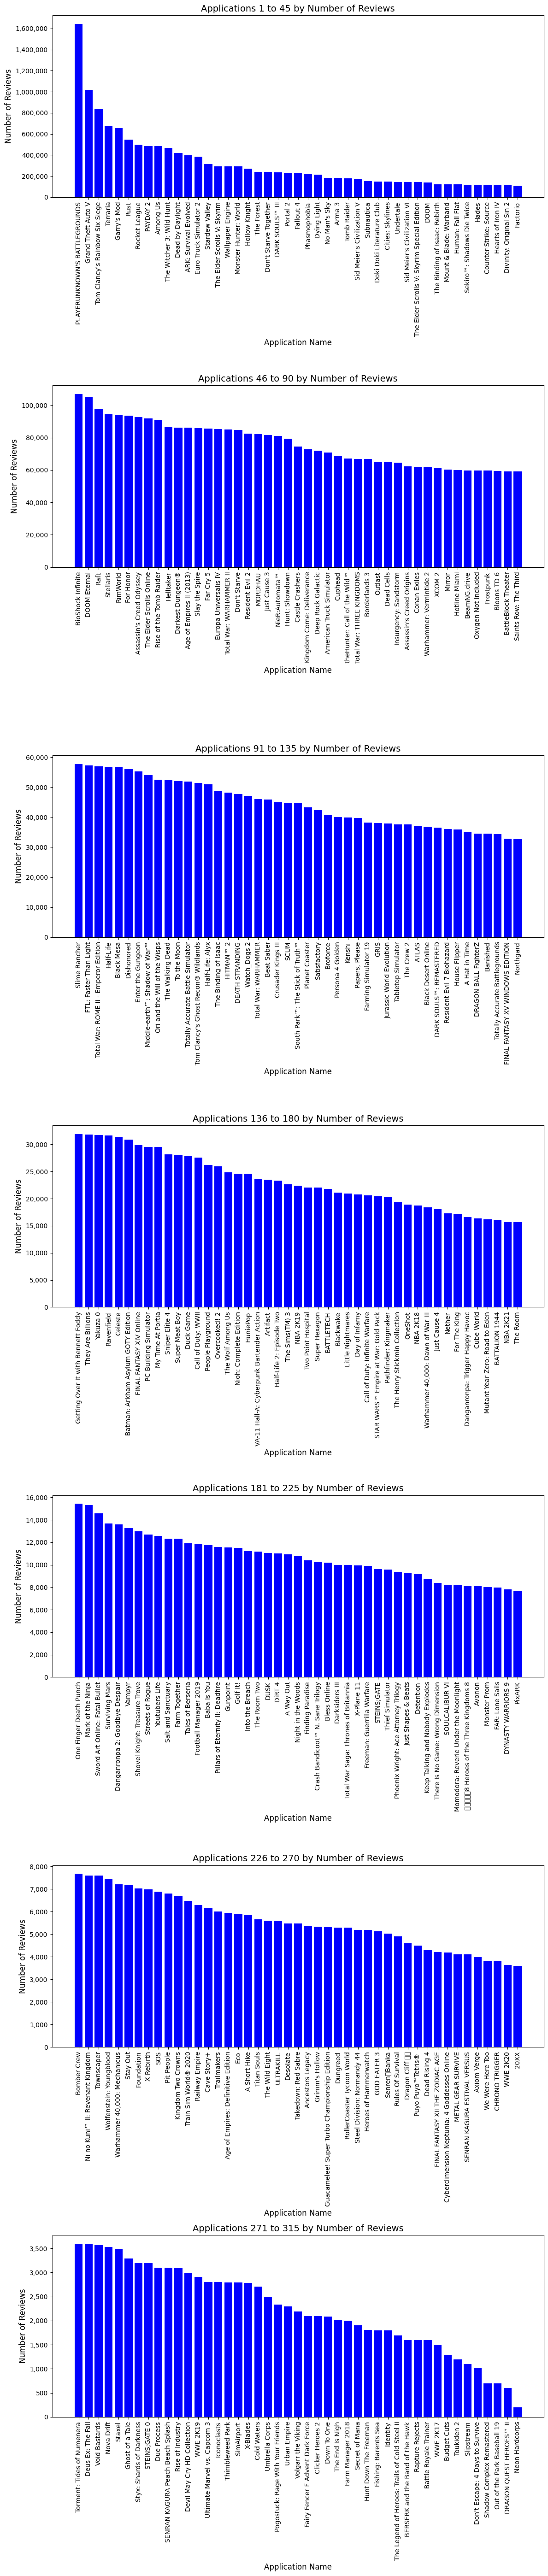

In [ ]:
sorted_reviews = app_reviews.sort_values(ascending=False)

''' We are establishing subPLot logic below since putting 315 numbers for each axis in one plot is not an appropriate way to follow. 
    So the number of applications per subplot will be 45, making the graph more readable and comprehensible.
    The total number of subplots will be 315/45 = 7, and they will all be presented horizontally. 
    A loop ensures that data is chunked from sorted data and plotted in descending order on subplots.
''' 
apps_per_plot = 45
num_subplots = int(np.ceil(len(sorted_reviews) / apps_per_plot))

fig, axes = plt.subplots(num_subplots, 1, figsize=(13, 7 * num_subplots))
axes = axes.flatten()

for i in range(num_subplots):
    start = i * apps_per_plot
    end = (i + 1) * apps_per_plot
    chunk = sorted_reviews[start:end]
    axes[i].bar(chunk.index, chunk.values, color='blue')
    axes[i].set_title(f"Applications {start + 1} to {min(end, len(sorted_reviews))} by Reviews", fontsize=12)
    axes[i].set_xlabel('Application Name', fontsize=10)
    axes[i].set_ylabel('Number of Reviews', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

* **For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.**

**Answer - Explanation on similarities:** The data shows that all top-5 applications (Garry's Mod, Grand Theft Auto V, PLAYERUNKNOWN'S BATTLEGROUNDS, Terraria, and Tom Clancy's Rainbow Six Siege) follow a similar pattern, with the majority of reviews coming from users who purchased the game, but there is still significant engagement from those who received the game for free. The consistency across these apps implies that purchase status is a key factor impacting review behavior. Paid users are more inclined to leave reviews.

**Code:**

In [ ]:
top_5_apps = data.groupby('app_name')['review_id'].count().sort_values(ascending=False).head()
top_5_reviews = data[data['app_name'].isin(top_5_apps.index)]

purchase_breakdown = top_5_reviews.groupby(['app_name', 'steam_purchase'])['review_id'].count().unstack()
purchase_breakdown['total_reviews'] = purchase_breakdown.sum(axis=1)
purchase_breakdown['purchased_percentage'] = (purchase_breakdown[True] / purchase_breakdown['total_reviews']) * 100
purchase_breakdown['free_percentage'] = (purchase_breakdown[False] / purchase_breakdown['total_reviews']) * 100

print(purchase_breakdown[['purchased_percentage', 'free_percentage']])

steam_purchase                  purchased_percentage  free_percentage
app_name                                                             
Garry's Mod                                84.089842        15.910158
Grand Theft Auto V                         88.827789        11.172211
PLAYERUNKNOWN'S BATTLEGROUNDS              83.485335        16.514665
Terraria                                   78.436013        21.563987
Tom Clancy's Rainbow Six Siege             83.437044        16.562956


* **Which applications have the most and the least user recommendations? Summarize your findings.**

**Answer:** ULTRAKILL has an impressive level of customer satisfaction, with almost all reviews recommending the game. This could be because its excellent gaming mechanics, well-received updates, or a devoted community. A high recommendation rate suggests that ULTRAKILL has successfully met or exceeded player expectations. On the contrary, Identity has suffered with user reception, with only around one-quarter of reviewers recommending the game. This could be related to a variety of issues, including unmet expectations, problems, or poor gameplay, resulting in general dissatisfaction among players. The stark contrast in recommendation rates between these two applications demonstrates how player satisfaction varies widely amongst games, with some receiving universal acclaim while others struggle to match user expectations.

**Code:**

In [ ]:
recommendations = data.groupby('app_name')['recommended'].sum()
most_recommended_app = recommendations.idxmax()
least_recommended_app = recommendations.idxmin()

print(f"App with most recommendations: '{most_recommended_app}' - {recommendations.max()} recommendations")
print(f"App with least recommendations: '{least_recommended_app}' - {recommendations.min()} recommendations")

885189
App with most recommendations: 'PLAYERUNKNOWN'S BATTLEGROUNDS' - 885189 recommendations
App with least recommendations: 'Neon Hardcorps' - 88 recommendations


* **Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.**

**Answer - Coorelation between recommendations (recommended) and applications' review scores (weighted_vote_score):** The average review scores and the percentage of suggestions have a statistically significant negative correlation (-0.73) (p-value = 0). This implies that the average review score tends to drop as the proportion of people who recommend an application rises. Even while this may come as a surprise, it implies that people might still suggest games even when they give them lower review scores. This could be because of subjective preferences or non-score-related variables like enjoyment or community involvement.

**Code:**

In [ ]:
import scipy.stats as stats

recommendation_percentage = (recommendations / data.groupby('app_name')['review_id'].count()) * 100

average_score = data.groupby('app_name')['weighted_vote_score'].mean()
correlation_data = pd.DataFrame({
    'recommendation_percentage': recommendation_percentage,
    'average_score': average_score
}).dropna()

correlation, p_value = stats.pearsonr(correlation_data['recommendation_percentage'], correlation_data['average_score'])
print(f"Pearson's correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

Pearson's correlation coefficient: -0.732499064506882
P-value: 3.2852408353297984e-54


# **[RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.**

* **Plot the number of reviews submitted each month and describe any trends.**

**Answer:** This line plot demonstrates how the number of reviews varies throughout the year. With a significant increase in reviews, November sees the highest level of review activity, which continues to be strong in December. During the summer, review activity consistently declines, reaching its lowest point in September.

**Code:**

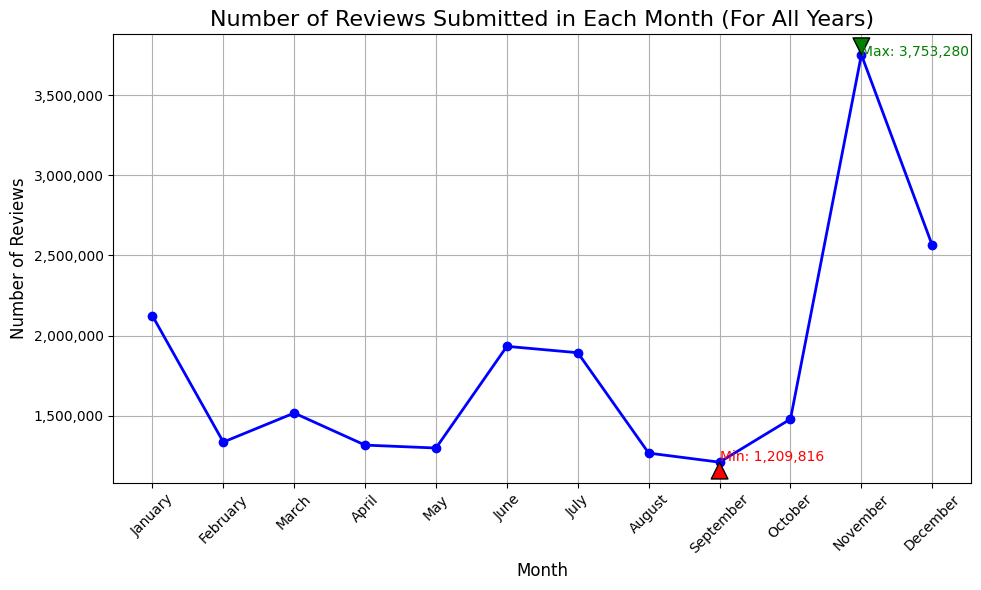

In [ ]:
data['month'] = data['timestamp_created'].dt.month
monthly_reviews = data.groupby('month')['review_id'].count()

plt.figure(figsize=(10, 7))
ax = monthly_reviews.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Number of Reviews Submitted in Each Month (For All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


min_value = monthly_reviews.min()
max_value = monthly_reviews.max()

min_month = monthly_reviews.idxmin()
max_month = monthly_reviews.idxmax()

# Annotate the min value
ax.annotate(f'Min: {min_value:,}', xy=(min_month, min_value), xytext=(min_month, min_value + 5000),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

# Annotate the max value
ax.annotate(f'Max: {max_value:,}', xy=(max_month, max_value), xytext=(max_month, max_value - 10000),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')

plt.grid(True)
plt.tight_layout()
plt.show()


* **Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.**

**Answer - Patterns in Graph:**
With a visible spike in activity during the fall and winter, particularly rising in November and December, the data shows a clear seasonal rhythm in user reviews.

*November Activity Peaked:* The month with the most notable increase in reviews (3.7) is November. This is most likely related to the holiday season, when a lot of people buy games as presents.

*Activity in December:* Even while December sees a decrease to 2.5 reviews, it is still higher than in most other months. This implies that the spike in gaming around the holidays lasts until December. Users continue to play games they received over the holidays, but they also have to deal with holiday-related events that take up time for submitting reviews, so the modest dip from November probably represents a balancing act.

*Mid-Season Stability:* January (2.2) and October (1.5) have more consistent, moderate review counts. Interestingly, summer months June (1.9) and July (1.8) had much higher involvement than August (1.3) and September (1.2). This indicates a mid-summer increase in reviews, however not as great as the peaks in the winter months.

*Reduced Activity in Late Summer and Early Fall:* August and September had the lowest levels of review activity. This is most likely due to vacations and less significant game releases during this period.

In conclusion, while the statistics show apparent increases in review activity in November and December, a more complex annual pattern emerges. Notably, the data show a mid-summer review increase. These statistics underscore the importance of seasonal factors, particularly holiday shopping and gaming, while also demonstrating various levels of participation throughout the year.

* **Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.**

**Answer** The largest level of interaction occurs in November, when user activity peaks at 3.7 reviews. This uptick is most likely caused by holiday shopping (Black Friday) and greater gaming throughout this month. Engagement remained high in December, with 2.5 reviews, indicating that individuals are still playing games they received as gifts throughout the holidays.

In contrast, the summer months had lower engagement rates, with June (1.9) and July (1.8) being considerably more active than August (1.3) and September (1.2). September, in particular, has the lowest activity of the year, indicating a drop in user involvement due to post-summer changes and fewer significant game releases.

In general the data clearly shows that certain times of year, particularly late fall and early winter, have much greater engagement rates, whereas summer and early fall months have lower activity.

* **What is the most common time of day users write reviews?**

For example, users might typically write reviews at 17:44. Explain how this time 
distribution could influence your analysis.


* **Create a function accepts a list of time intervals and plots the number of reviews for each interval.**


* **Use the function to plot the number of reviews for the following time intervals:**

| **Interval ID** | **Initial Time** | **Final Time** |
|-----------------|------------------|----------------|
| Interval 1      | 00:00:00         | 02:59:59       |
| Interval 2      | 03:00:00         | 05:59:59       |
| Interval 3      | 06:00:00         | 10:59:59       |
| Interval 4      | 11:00:00         | 13:59:59       |
| Interval 5      | 14:00:00         | 16:59:59       |
| Interval 6      | 17:00:00         | 19:59:59       |
| Interval 7      | 20:00:00         | 23:59:59       |


Summarize your findings from the time interval analysis.



**Answer: Summarizing the findings:**

*Peak Activity:* Interval 3 (06:00:00 - 10:59:59) shows the highest number of reviews, indicating strong morning engagement.

*Other high-activity intervals include:*
Interval 7 (20:00:00 - 23:59:59) - Increased evening engagement.
Interval 5 (14:00:00 - 16:59:59) - Notable early afternoon activity.

*Lower Activity:*
Intervals 1 and 2 (00:00 - 05:59) show comparatively low review counts, indicating reduced late-night and early morning engagement.

Implications for Analysis: User activity peaks during typical waking hours,  mcan be helpful for marketing strategies and timing for outreach.

**Code:**

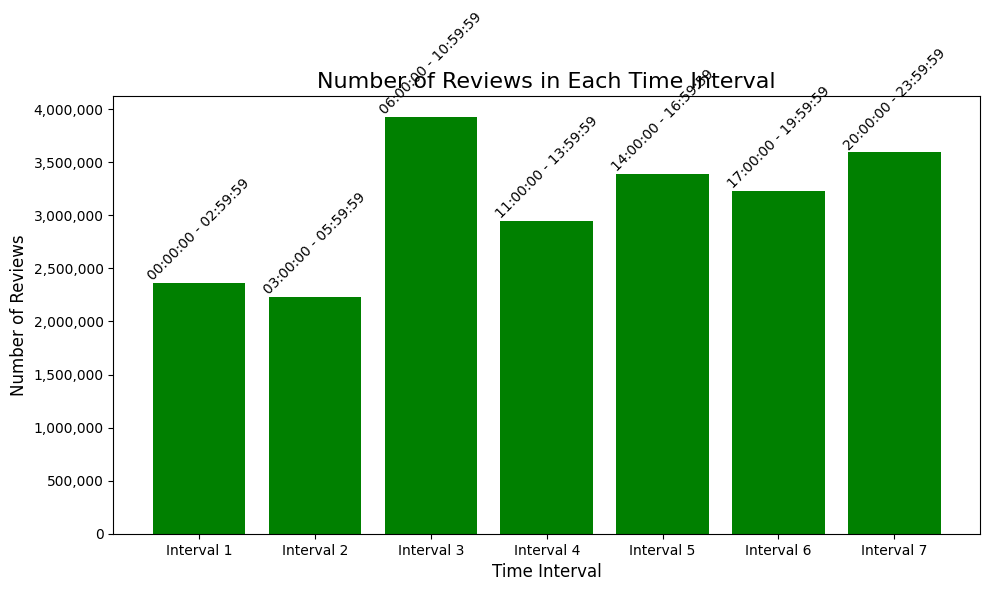

In [ ]:
def plot_reviews_by_time_intervals(data, time_intervals):

    data['time_of_day'] = data['timestamp_created'].dt.time
    review_counts = []
    
        for interval in time_intervals:
        start_time = interval['Initial Time']
        end_time = interval['Final Time']
        
        start_time = pd.to_datetime(start_time).time()
        end_time = pd.to_datetime(end_time).time()
        
        mask = (data['time_of_day'] >= start_time) & (data['time_of_day'] <= end_time)
        reviews_in_interval = data[mask]
        
        review_counts.append(len(reviews_in_interval))
    
    interval_ids = [interval['Interval ID'] for interval in time_intervals]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(interval_ids, review_counts, color='green')
    plt.title('Number of Reviews in Each Time Interval', fontsize=14)
    plt.xlabel('Time Interval', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)

    # Ensure y-axis shows whole numbers
    ax = plt.gca()  
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  
    
    # Annotate bars with time intervals at the top
    for bar, interval in zip(bars, time_intervals):
        height = bar.get_height()
        interval_label = f"{interval['Initial Time']} - {interval['Final Time']}"
        plt.text(bar.get_x() + bar.get_width() / 2, height, interval_label, ha='center', va='bottom', fontsize=9, rotation=45)
    plt.tight_layout()
    plt.show()

# Defining the time intervals
time_intervals = [
    {'Interval ID': 'Interval 1', 'Initial Time': '00:00:00', 'Final Time': '02:59:59'},
    {'Interval ID': 'Interval 2', 'Initial Time': '03:00:00', 'Final Time': '05:59:59'},
    {'Interval ID': 'Interval 3', 'Initial Time': '06:00:00', 'Final Time': '10:59:59'},
    {'Interval ID': 'Interval 4', 'Initial Time': '11:00:00', 'Final Time': '13:59:59'},
    {'Interval ID': 'Interval 5', 'Initial Time': '14:00:00', 'Final Time': '16:59:59'},
    {'Interval ID': 'Interval 6', 'Initial Time': '17:00:00', 'Final Time': '19:59:59'},
    {'Interval ID': 'Interval 7', 'Initial Time': '20:00:00', 'Final Time': '23:59:59'}
]

plot_reviews_by_time_intervals(data, time_intervals)


# **[RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.**

* **Analyze the relationship between the amount of time a user has spent on an application and their review score.**

**Answer:** 
The data reveals a very modest positive correlation between the amount of time a user spends on an application and their review score, with a Pearson correlation coefficient of 0.0466. This means that users who spend longer time on a program may provide slightly higher scores, although the effect is negligible. The link is statistically significant, as evidenced by a p-value of almost 0, indicating that it is unlikely to be related to chance. However, the dispersion of review scores, even at higher playtime levels, shows that factors other than playtime, such as personal preferences or individual gaming experiences, are more likely to affect users' ratings.

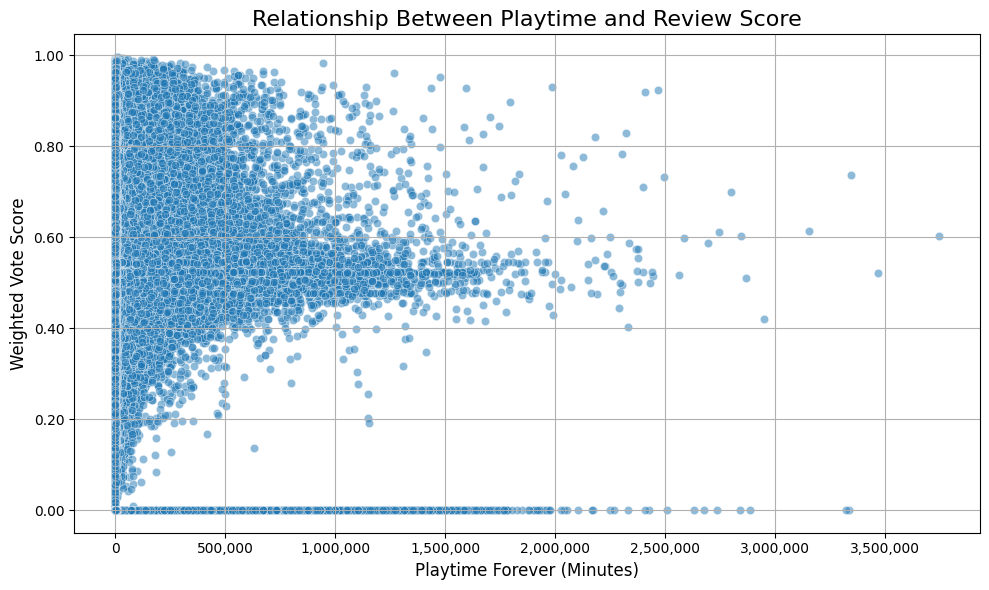

Pearson's correlation coefficient: 0.0466
P-value: 0.0000e+00

                          author.playtime_forever  weighted_vote_score
author.playtime_forever                 1.000000             0.046574
weighted_vote_score                     0.046574             1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['author.playtime_forever'], y=data['weighted_vote_score'], alpha=0.5)
plt.title('Relationship Between Playtime and Review Score', fontsize=14)
plt.xlabel('Playtime Forever (Minutes)', fontsize=12)
plt.ylabel('Weighted Vote Score', fontsize=12)

# Get current axis
ax = plt.gca()  
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(data['author.playtime_forever'], data['weighted_vote_score'])

print(f"Pearson's correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

corr_matrix = data[['author.playtime_forever', 'weighted_vote_score']].corr()
print(f"\n {corr_matrix}")

*  **Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.**

**Answer:** The statistics demonstrate that more experienced users, as measured by longer gameplay, do not consistently provide higher or lower ratings. The correlation between playtime and review score is extremely weak (0.0466), showing that there is no significant association between how long a person plays and the rating they provide. Users with both high and low playtime can be seen providing a wide variety of scores, from very low to extremely high. This shows that the length of time users spend using the application has little influence on whether they rate it positively or negatively, and that other factors are most likely influencing their review decisions.

* **Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.**


**Answer - Statistical Difference:**
There is a large disparity in review scores between new and experienced users. New users tend to provide lower scores more frequently (with a high density of 0.0), whereas seasoned users have a more diversified distribution with a wider range of scores. This implies that experience level (playtime) may influence how users rate an application, with more experienced users likely providing more diversified reviews than novice users.
**Code:**

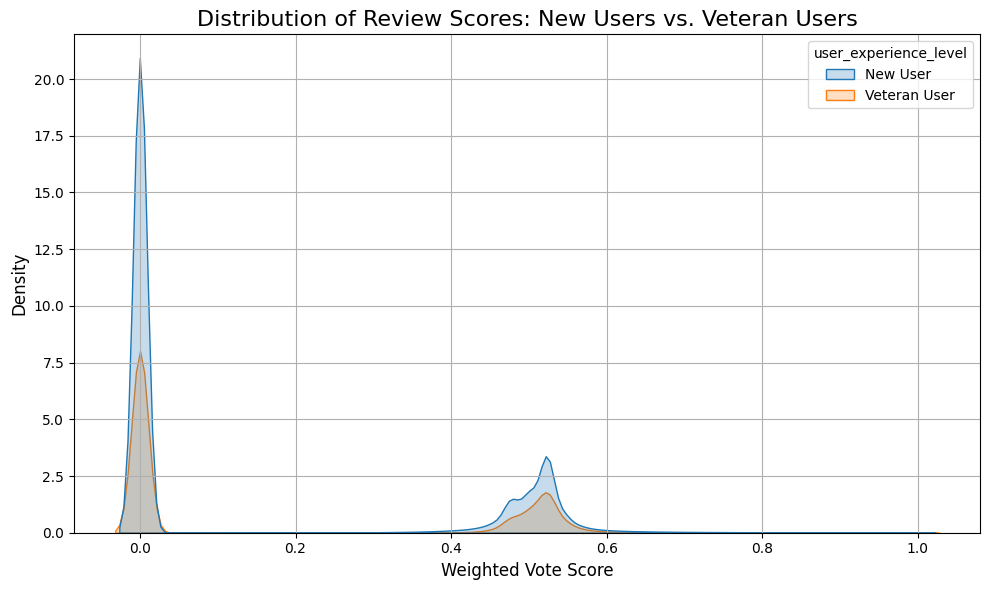

Mann-Whitney U test statistic: 49515306939217.5000
P-value: 0.0000e+00
There is a statistically significant difference in the score distributions between new users and veteran users.


In [ ]:
from scipy.stats import mannwhitneyu

# User experience analysis
data['user_experience'] = np.where(data['author.playtime_forever'] < 10000, 'New User', 'Veteran User')
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='weighted_vote_score', hue='user_experience', fill=True)
plt.title('Distribution of Review Scores: New Users vs. Veteran Users', fontsize=16)
plt.xlabel('Weighted Vote Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Perform the Mann-Whitney U test to compare the distributions
new_user_scores = data[data['user_experience'] == ['New User']['weighted_vote_score']
veteran_user_scores = data[data['user_experience'] == ['Veteran User']['weighted_vote_score']
# Perform test
stat, p_value = mannwhitneyu(new_user_scores, veteran_user_scores)
print(f"Mann-Whitney U test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4e}")


if p_value < 0.05:
    print("There is a statistically significant difference in the score distributions between new users and veteran users.")
else:
    print("There is no statistically significant difference in the score distributions between new users and veteran users.")

* **Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?**


#### **Addtional Factors Suggested by LLM:**

##### Game Genre:
*Hypothesis:* Certain genres may retain users longer, but users could have different satisfaction levels depending on the genre.

*Explanation:* Players may spend more time on genres like MMORPGs or strategy games, which are designed for long-term engagement. However, genres like story-based RPGs or single-player action games may result in shorter playtime but higher satisfaction, leading to higher ratings.

*Validation:* Analyzing how the different game genres correlate with playtime and review scores. Players of multiplayer or open-world games may show higher variance in their ratings based on their playtime compared to players of shorter.

##### Multiplayer vs. Single Player Experience:
*Hypothesis:* Users who spend more time on multiplayer features may have different experiences than those who focus on single-player content.

*Explanation:* Multiplayer experiences can vary widely based on factors like server stability, community toxicity, and matchmaking quality. Veteran users who engage heavily in multiplayer might rate the game higher due to its replayability, or lower due to poor multiplayer experiences.

*Validation:* By comparing review scores between players who spend time in multiplayer modes versus those who primarily play single-player content. Players who engage more with the multiplayer aspect may exhibit higher or lower ratings depending on the quality of the multiplayer experience.

##### Game Complexity (Learning Curve):
*Hypothesis:* More complex games with steep learning curves might lead to lower ratings from new users and higher ratings from veteran users.

Explanation: Games with a steep learning curve or complex mechanics may frustrate new users, leading to lower ratings. However, veteran users who have mastered the game might give higher ratings due to a sense of accomplishment or deeper engagement.

*Validation:* By Identifying the games with high complexity (e.g., strategy games, simulations, or competitive titles) and we can see if there is a trend where longer playtime correlates with higher ratings for these types of games.

##### Game Reviews During Sales or Free Weekends:
*Hypothesis:* Users who purchase a game during Steam sales or access it during a free weekend may have different review patterns than those who purchase the game at full price.

*Explanation:*: Users who get games on sale or play during a free weekend may rate games based on a lower set of expectations, leading to higher scores from users who feel they got good value. Alternatively, they may be less invested and provide more casual, lower ratings.

*Validation:* By Analyzing if review scores differ based on whether the game was purchased during a Steam sale or played during a free weekend. This may influence both new and veteran users’ ratings.


# **[RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.**

*  **Determine the ten reviewers with the highest number of reviews in the dataset.**

**Answer:** The top 1 reviever had 149 reviews and the top 10 had 86 reviews. In total, those 10 reviewers had a 1061 total of reviews.

**Code:**

In [ ]:
top_reviewers = data.groupby('author.steamid')['review_id'].count().reset_index()
top_reviewers.columns = ['Reviewer Steam ID', 'Number of Reviews']
top_reviewers = top_reviewers.sort_values(by='Number of Reviews', ascending=False)
top_10_reviewers = top_reviewers.head(10)

print(top_10_reviewers)

         Reviewer Steam ID  Number of Reviews
2404869  76561198062813911                149
7556739  76561198315585536                132
5762519  76561198192166873                107
6336465  76561198239163744                106
1845956  76561198045381877                103
2474248  76561198064946151                100
958445   76561198013146396                 99
1327219  76561198027973295                 91
128497   76561197969749884                 88
424935   76561197989746995                 86


In [ ]:
top_reviewers["Number of Reviews"].head(10).sum()

1061

* **What is the percentage of each language used by these top 10 reviewers when submitting a review?**

**Answer:** The top 10 reviewers used english (54%), russian (27,8%), and schinese (18%)langauge to write down their reviews.

**Code:**

In [ ]:
# Get the top 10 reviewers, this 'top_10_reviewers' is from previous cell code part  
top_10_reviews = data[data['author.steamid'].isin(top_10_reviewers['Reviewer Steam ID'])]

language_counts = top_10_reviews.groupby('language')['review_id'].count().reset_index()

# Calculate the percentage of each language
language_counts['Percentage'] = (language_counts['review_id'] / top_10_reviews['review_id'].count()) * 100
language_counts.columns = ['Language', 'Number of Reviews', 'Percentage']

print(language_counts.sort_values(by='Number of Reviews', ascending=False))

   Language  Number of Reviews  Percentage
0   english                575   54.194156
1   russian                295   27.803959
2  schinese                191   18.001885


* **Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.**

**Answer:** 
The data shows that not all top reviewers are equally regarded by the Steam community. Some are quite active but receive little engagement, implying spam-like conduct or lower-quality reviews, since the highest reviewer has an average voting score of only 0.88. Meanwhile, those that obtain more average helpful votes tend to write more valuable or insightful evaluations, which the community values. This emphasizes the significance of quality above quantity when seeking attention and approval from the Steam community.

**Code:**

In [ ]:
top_10_reviewers_ids = top_10_reviewers['Reviewer Steam ID']

top_10_reviews = data[data['author.steamid'].isin(top_10_reviewers_ids)]

helpful_votes_avg = top_10_reviews.groupby('author.steamid')['votes_helpful'].mean().reset_index()
helpful_votes_avg.columns = ['Reviewer Steam ID', 'Average Helpful Votes']

top_10_reviewers_with_votes = pd.merge(
    top_10_reviewers,
    helpful_votes_avg,
    on='Reviewer Steam ID',
    how='left'
)

print(top_10_reviewers_with_votes)

   Reviewer Steam ID  Number of Reviews  Average Helpful Votes
0  76561198062813911                149               0.885906
1  76561198315585536                132              49.712121
2  76561198192166873                107              38.897196
3  76561198239163744                106               7.641509
4  76561198045381877                103               2.252427
5  76561198064946151                100               3.990000
6  76561198013146396                 99               0.969697
7  76561198027973295                 91              11.307692
8  76561197969749884                 88              26.238636
9  76561197989746995                 86              21.058140


* **Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.**

**Code:**

C:\Users\user\AppData\Local\Temp\ipykernel_3768\3857442857.py:55: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_3768\3857442857.py:55: UserWarning: Glyph 23830 (\N{CJK UNIFIED IDEOGRAPH-5D16}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_3768\3857442857.py:55: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_3768\3857442857.py:55: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_3768\3857442857.py:55: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_3768\3857442857.py:55: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from cur

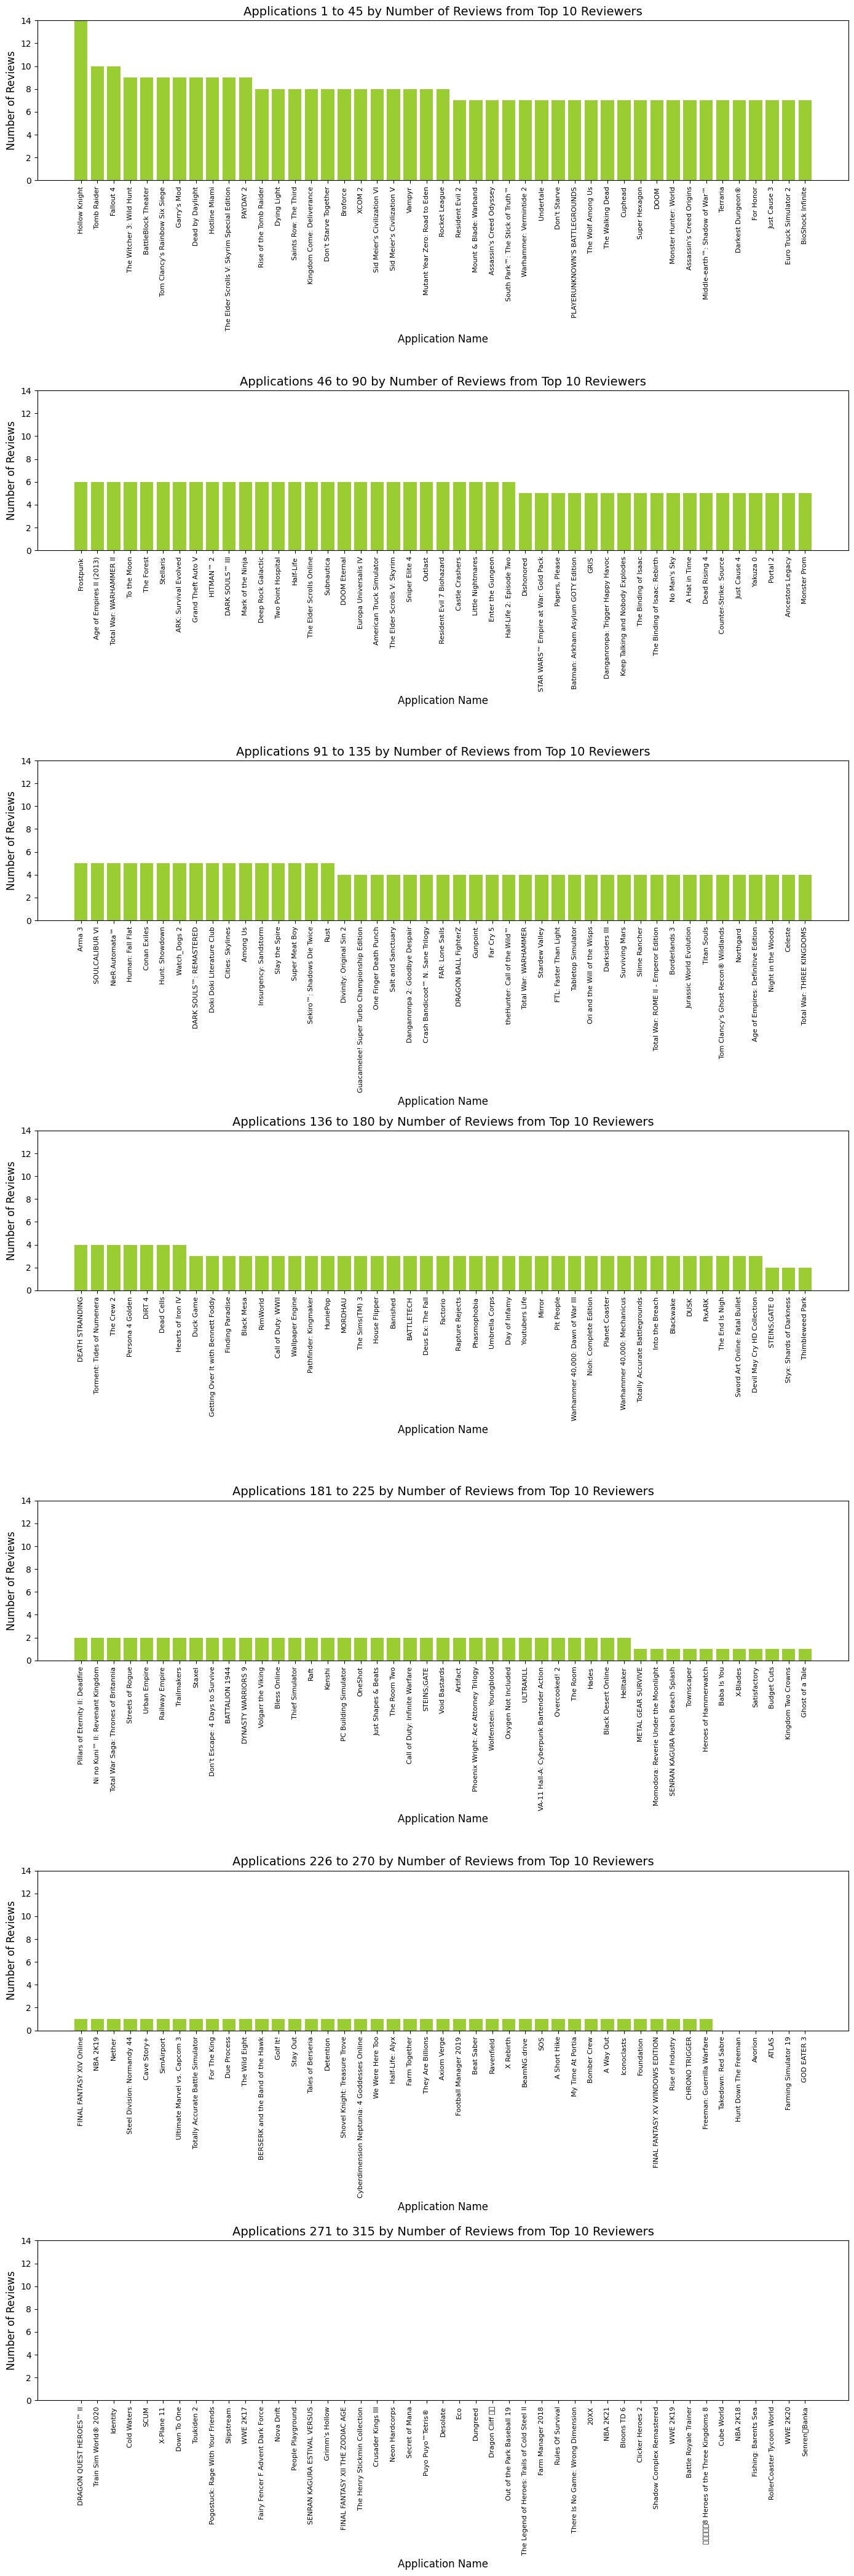

In [ ]:
top_10_reviews = data[data['author.steamid'].isin(top_10_reviewers_ids)]

app_review_counts = top_10_reviews.groupby('app_name')['review_id'].count().reset_index()
app_review_counts.columns = ['Application Name', 'Number of Reviews']

app_review_counts_sorted = app_review_counts.sort_values(by='Number of Reviews', ascending=False)

apps_per_plot = 45
num_subplots = int(np.ceil(len(app_review_counts_sorted) / apps_per_plot))
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(14, 6 * num_subplots))
axes = axes.flatten() if num_subplots > 1 else [axes]

for i in range(num_subplots):
    
    start = i * apps_per_plot
    end = min((i + 1) * apps_per_plot, len(app_review_counts_sorted))
    
    chunk = app_review_counts_sorted[start:end]
    
    axes[i].bar(chunk['Application Name'], chunk['Number of Reviews'], color='yellowgreen')
    axes[i].set_title(f"Applications {start + 1} to {end} by Number of Reviews from Top 10 Reviewers", fontsize=14)
    axes[i].set_xlabel('Application Name', fontsize=12)
    axes[i].set_ylabel('Number of Reviews', fontsize=12)
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    max_y = app_review_counts_sorted['Number of Reviews'].max() * 1.1
    axes[i].set_ylim(0, max_y)


plt.tight_layout()
plt.show()

# **[RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers**

* ***Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?**

**Answer:** English speaking reviewers are more prone to edit or update their reviews. The percentage of update of english reviews is 11.39%, while in the spanish are 9.48%.

**Code:**

In [ ]:
english_reviews = data[data['language'] == 'english']
spanish_reviews = data[data['language'] == 'spanish']

# Determine the number of updated reviews (where timestamp_updated differs from timestamp_created).
english_updates = english_reviews[english_reviews['timestamp_updated'] > english_reviews['timestamp_created']]
spanish_updates = spanish_reviews[spanish_reviews['timestamp_updated'] > spanish_reviews['timestamp_created']]

english_update_percentage = (len(english_updates) / len(english_reviews)) * 100
spanish_update_percentage = (len(spanish_updates) / len(spanish_reviews)) * 100

print(f"Percentage of updated reviews for English reviewers: {english_update_percentage:.2f}%")
print(f"Percentage of updated reviews for Spanish reviewers: {spanish_update_percentage:.2f}%")

if english_update_percentage > spanish_update_percentage:
    print("English reviewers are more likely to edit or update their reviews.")
else:
    print("Spanish reviewers are more likely to edit or update their reviews.")

Percentage of updated reviews for English reviewers: 11.29%
Percentage of updated reviews for Spanish reviewers: 9.48%
English reviewers are more likely to edit or update their reviews.


*  **Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?**

**Answer:** The data demonstrates the substantial difference in activity on the platform between English and Spanish reviewers. English reviewers have an average of 1,373,578 games and write 457,815.68 reviews, which is far more than Spanish reviewers, who own 121.91 games and write 9.39 reviews. This indicates that English-speaking reviewers are significantly more active in terms of both game ownership and review submission.

In [ ]:
english_reviews = data[data['language'] == 'english']
spanish_reviews = data[data['language'] == 'spanish']

average_games_owned_english = english_reviews['author.num_games_owned'].mean()
average_games_owned_spanish = spanish_reviews['author.num_games_owned'].mean()

average_games_reviewed_english = english_reviews['author.num_reviews'].mean()
average_games_reviewed_spanish = spanish_reviews['author.num_reviews'].mean()

print(f"Average number of games owned by English reviewers: {average_games_owned_english:.2f}")
print(f"Average number of games owned by Spanish reviewers: {average_games_owned_spanish:.2f}")

print(f"Average number of reviews written by English reviewers: {average_games_reviewed_english:.2f}")
print(f"Average number of reviews written by Spanish reviewers: {average_games_reviewed_spanish:.2f}")

Average number of games owned by English reviewers: 1373578.16
Average number of games owned by Spanish reviewers: 121.91
Average number of reviews written by English reviewers: 457815.68
Average number of reviews written by Spanish reviewers: 9.39


# **[RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.**

* **What is the probability of submitting a review and receiving at least one helpful vote from other users?**

**Answer:**  The probability of getting at least one helpful vote from other users is 28%.


In [ ]:
''' In order to get the probability, the number of reviews that received helpful
    votes is divided by the total number of reviews in the dataset.'''

probability_helpful = len(data[data['votes_helpful'] > 0]) / len(data)
print(f"Probability of receiving at least one helpful vote: {probability_helpful:.4f} ({probability_helpful * 100:.2f}%)")

Probability of receiving at least one helpful vote: 0.2809 (28.09%)


* **What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?**

**Answer:** The probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app is arround 48%

**Code:**

In [ ]:
''' To begin, count the total number of reviews in which the reviewer did not suggest the application. 
    The data must then be filtered to remove reviews that were not recommended yet received some useful votes. Then determine the probability of it. '''

non_recommended_reviews = data[data['recommended'] == False]
probability_helpful_non_recommended = len(non_recommended_reviews[non_recommended_reviews['votes_helpful'] > 0]) / len(non_recommended_reviews)
print(f"Probability of receiving at least one helpful vote given that the review does not recommend the app is : {probability_helpful_non_recommended:.4f} ({probability_helpful_non_recommended * 100:.2f}%)")


Probability of receiving at least one helpful vote given that the review does not recommend the app is : 0.4845 (48.45%)


*   **Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.**

**Answer:**
According to the analysis, the probability of a review earning at least one helpful vote is 28.09% overall, but increases to 34.36% when the reviewer has written at least five previous reviews. This distinction demonstrates that these two events are not independent: a review's chances of earning a helpful vote are reliant on the reviewer's experience. More experienced reviewers are more likely to have their evaluations perceived as useful, implying that users value contributions from individuals with a history of active reviewing.

**Code:**


In [ ]:
print(f"Probability of receiving at least one helpful vote (unconditional): {probability_helpful_vote:.4f} ({probability_helpful_vote * 100:.2f}%)")

reviews_with_5_plus = data[data['author.num_reviews'] >= 5]
probability_helpful_5_plus = len(reviews_with_5_plus[reviews_with_5_plus['votes_helpful'] > 0]) / len(reviews_with_5_plus)
print(f"Probability of receiving at least one helpful vote given that the reviewer has submitted at least five reviews: {probability_helpful_5_plus:.4f} ({probability_helpful_5_plus * 100:.2f}%)")

Probability of receiving at least one helpful vote (unconditional): 0.2809 (28.09%)
Probability of receiving at least one helpful vote given that the reviewer has submitted at least five reviews: 0.3436 (34.36%)


* **We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.**


**Answer:** 
The analysis reveals that there is no significant correlation between the number of games a reviewer owns and the number of reviews they submit, as evidenced by a Pearson's correlation coefficient of -0.0000 and a p-value of 0.9995. This shows that a user's likelihood of publishing reviews on the site is unaffected by how many games he or she owns. The findings suggest that other factors, such as user engagement or personal motivation, are more likely to influence whether a user leaves a review, independent of the size of their gaming collection.


**Code:**

In [ ]:
correlation, p_value = pearsonr(data['author.num_games_owned'], data['author.num_reviews'])
print(f"Pearson's correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between the number of games owned and the number of reviews submitted.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the number of games owned and the number of reviews submitted.")

Pearson's correlation coefficient: -0.0000
P-value: 9.9946e-01
Fail to reject the null hypothesis: There is no significant relationship between the number of games owned and the number of reviews submitted.


* **Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?**

##### **Response by chatGPT:**
1. Histograms

            Purpose: Histograms are used to visualize the distribution of a single numerical variable. They group data into bins and show how many data points fall into each range.

            Insights:
            Shape of the distribution: Identifies whether the data is normal, skewed, bimodal, or has outliers.
            Central tendency: Highlights the mean or median range where most data points lie.
            Spread: Indicates the variability or dispersion of the data.
            Useful for: Understanding the overall structure of a dataset, detecting skewness , and identifying potential anomalies or outliers.

2. Bar Plots

            Purpose: Bar plots are used to compare the values or frequencies of different categories within a categorical variable. Each bar represents a category, and its height corresponds to the associated value (count, percentage, etc.).

            Insights:
            Correlation: Reveals the strength and direction (positive/negative) of the relationship between variables.
            Linearity: Shows whether the relationship is linear or non-linear.
            Outliers: Highlights unusual data points that deviate from the main pattern.
            Clusters: May indicate the presence of subgroups or patterns within the data.
            Useful for: Examining the association between two variables, identifying trends, spotting outliers and potential subgroups.

3. Scatterplots

            Purpose: Scatterplots visualize the relationship between two numerical variables. Each point on the plot represents a data point with x and y coordinates corresponding to the two variables.
            Insights:
            Correlation: Reveals the strength and direction (positive/negative) of the relationship between variables.
            Linearity:Shows whether the relationship is linear or non-linear.
            Outliers: Highlights unusual data points that deviate from the main pattern.
            Clusters: May indicate the presence of subgroups or patterns within the data.
            Useful for: Examining the association between two variables, identifying trends, spotting outliers and potential subgroups.

4. Pie Charts

            Purpose: Pie charts display the proportions or percentages of different categories within a single categorical variable. Each slice represents a category, with its size proportional to its contribution to the whole.
            Insights:
            Part-to-whole relationships: Shows how each category contributes to the overall total.
            Relative proportions: Allows comparison of the relative sizes of categories.
            Dominant categories: Highlights the largest and smallest contributing categories.
            Useful for: Showing the composition of a single categorical variable and comparing proportions but generally less informative than bar charts for precise comparison, and should be used when there are not too many categories.


* **trustworthy results?** We think ChatGPT did a solid job explaining things – the answers were clear and well-written. But, we can dig a little deeper and get even more from those graphs we talked about:

Histograms - Spotting the Extremes and Empty Spaces:

Basically, histograms are great for seeing the full picture of your data. They quickly show you where the smallest and largest values are, basically how far your data stretches. You can also easily spot if there are any weird gaps or empty spots in the middle, like if certain values just aren’t showing up.
Scatterplots - More Than Just Seeing a Trend:

Scatterplots are awesome for seeing if and how two things are related, but they also play a key role in prediction. By drawing a “best fit” line (that’s a regression line), we can really see how well a straight line matches up to the data. This is super helpful for figuring out if you can accurately predict one thing based on another.
Bar Plots - Getting a Sense of Uncertainty:

Bar plots don’t just show the average or total for each category. We can also add those little “error bars” on top of each bar. These give you a sense of how much the data varies, or how uncertain our measurements are for that group.
Pie Charts - Good When Simple is Best:

Pie charts aren’t usually the best for making detailed comparisons, but they really shine when you have a small number of categories – like maybe 3, 4, or 5. When it’s that simple, it’s hard to beat the visual impact of seeing how those slices of the pie add up to the whole.

# **Algorithmic Question (AQ)**

# Problem Statement

You are given two positive integers, 
*n* (where 1 <=  n <= 10^9) and  k  (where q <= k <= 100). Your task is to express  *n* as the sum of *k** positive integers, all having the same parity (i.e., all have the same remainder when divided by 2, meaning they are either all even or all odd). In other words, find 
 a_1, a_2....., a_k  each a_i > 0 for all all i , satisfying n = a_1 + a_2 + ... + a_k, and all  a_i  are simultaneously either even or odd. If it is impossible to represent  *n* this way, report that no such representation exists.

## Input

In the first input line, you will receive a number  t (where  1 <=  t  <= 100 ), representing the number of test cases. The following  t lines will contain two values, *n* and *k* corresponding to each test case.

## Output

For each test case, if it is possible to represent *n* as the sum of *k* positive integers, all of the same parity (either all even or all odd), print "YES" and provide the corresponding values of  a_i in the next line. If there are multiple valid solutions, you may print any of them. If such a representation is not possible for a given test case, print "NO".

## Examples

### Input


8
10 3
100 4
8 7
97 2
8 8
3 10
5 3

### Output

YES
4 2 4
YES
55 5 5 35
NO
NO
YES
1 1 1 1 1 1 1 1
NO
YES
3 1 1




* **Implement a Python program to solve the problem above.**

**Code:**

In [ ]:
# Function to check if n can be expressed as a sum of k integers with the same parity
def sum_with_same_parity(n, k):
    if n >= 2 * k and (n - 2 * (k - 1)) % 2 == 0:
        return "YES", [2] * (k - 1) + [n - 2 * (k - 1)]
    if n >= k and (n - k) % 2 == 0:
        return "YES", [1] * (k - 1) + [n - (k - 1)]
    return "NO", []

# Test function
def run_tests():
    t = int(input())
    for _ in range(t):
        n, k = map(int, input().split())
        result, numbers = sum_with_same_parity(n, k)
        print(result)
        if result == "YES":
            print(*numbers)

run_tests()

# The condition (n - k) % 2 == 0 ensures that n and k have the same parity. This is because the sum of k numbers
# of the same parity is always even if k is even and the parity of n must match this sum; if k is odd, the sum
# has the same parity of the numbers (odd), so n must be also odd.

* **Please provide an analysis of your code's time complexity using Big O notation**

**Answer:**
The list creation and concatenation operations are the main causes of the sum_with_same_parity function having O(k) time complexity, which scales linearly with the input k. An overall time complexity of O(t * k) is produced by the run_tests function, which contains a loop that executes t times and calls the sum_with_same_parity function, which has a complexity of O(k). As a result, the code's overall temporal complexity is O(t * k).
The worst-case scenario is O(100×100)=O(10,000) since the upper bounds of t and k are both 100.

* **Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to evaluate the time complexity of your code using Big O notation. Is the assessment accurate? If it differs from your previous analysis, which would be correct? Please explain your reasoning.**

**Answer:**
The two analyses shows the same outcome.